<br>
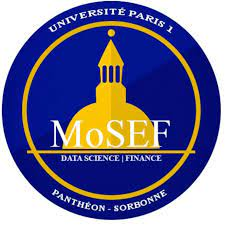
<div align="right">Enseignant : Grégory FUTHAZAR</div>
<div align="right">Réalisé par : Anisoara ABABII, Gaoussou DIAKITE, Eunice KOFFI, Amine BOUKIR</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Machine Learning Avancé</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Notebook</span></div><br>
<hr/>

# I. Préparation de l'environnement

## 1. Installation des packages

## 2. Import des librairies et modules

In [1]:
import data_utils
import model
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

True

# II. Lecture des données

## 1. Chargement des données

In [2]:
train_df, test_df = data_utils.load_imdb_data()

Found cached dataset p3 (C:/Users/ekeun/.cache/huggingface/datasets/bigscience___p3/imdb_Movie_Expressed_Sentiment_2/0.1.0/204f22caf7f0cbaf01a8631ec396c1cab69f8d71f276fb8619fae696536874ab)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
# Afficher les premières lignes de chaque dataframe
print("---------------  Train ------------------------")
train_df.head(3)

---------------  Train ------------------------


answer_choices                                             inputs  \
0  [negative, positive]  [37, 826, 1974, 1132, 3980, 15, 7, 125, 6493, ...   
1  [negative, positive]  [37, 826, 1974, 1132, 3980, 15, 7, 125, 6493, ...   
2  [negative, positive]  [37, 826, 1974, 1132, 3980, 15, 7, 125, 6493, ...   

                                 inputs_pretokenized    targets  \
0  The following movie review expresses what sent...  [1465, 1]   
1  The following movie review expresses what sent...  [1465, 1]   
2  The following movie review expresses what sent...  [1465, 1]   

  targets_pretokenized  
0             positive  
1             positive  
2             positive

In [4]:
print("---------------  Test ------------------------")
test_df.head(3)

---------------  Test ------------------------


answer_choices                                             inputs  \
0  [negative, positive]  [37, 826, 1974, 1132, 3980, 15, 7, 125, 6493, ...   
1  [negative, positive]  [37, 826, 1974, 1132, 3980, 15, 7, 125, 6493, ...   
2  [negative, positive]  [37, 826, 1974, 1132, 3980, 15, 7, 125, 6493, ...   

                                 inputs_pretokenized    targets  \
0  The following movie review expresses what sent...  [1465, 1]   
1  The following movie review expresses what sent...  [1465, 1]   
2  The following movie review expresses what sent...  [1465, 1]   

  targets_pretokenized  
0             positive  
1             positive  
2             positive

- Nous travaillerons uniquement avec les bases de données train et test. La base de données unsupervised ne nous intéresse pas. 
- Seules deux variables nous servirons dans la suite de notre analyse (**inputs_pretokenised** et **targets_pretokenised**)

## Structure des bases de données

In [3]:
train, test = data_utils.infos_data(train_df, test_df)

Sélection de variables : --------> OK


*********Dimensions des bases de données********
---------------  Train ------------------------
(25000, 2)
---------------  Test ------------------------
(25000, 2)


********** Infos sur les bases de données ********
---------------  Train ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   inputs_pretokenized   25000 non-null  object
 1   targets_pretokenized  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


---------------  Test ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   inputs_pretokenized   25000 non-null  object
 1   targets_pretokenized  25000 non

# III. Prétraitement et visualisation

- Les deux bases de données ne contiennent aucune valeur manquantes.
- Nous avons également des proportions égales de commentaires positifs et négatifs. Les bases de données sont équilibrées.

Cependant, nous constatons une coquille dans les bases de données.
- Toutes les lignes sont précédées d'une phrase commune nous allons commencer par supprimer cette phrase avant de continuer. 

## 1. Suppression de la phrase commune

In [4]:
train = data_utils.remove_phrase(train, 'The following movie review expresses what sentiment? ')
test = data_utils.remove_phrase(test, 'The following movie review expresses what sentiment? ')


C:\Users\ekeun\OneDrive - Université Paris 1 Panthéon-Sorbonne\Pybooks\Projets M2_MOSEF\ML Avancé\data_utils.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i:i, 'test'] = df.loc[i:i, 'inputs_pretokenized'].str.startswith(phrase)
C:\Users\ekeun\OneDrive - Université Paris 1 Panthéon-Sorbonne\Pybooks\Projets M2_MOSEF\ML Avancé\data_utils.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i:i, 'test'] = df.loc[i:i, 'inputs_pretokenized'].str.startswith(phrase)


## 2. Nombre de mots


In [7]:
# Application au train uniquement
train[['nombre_phrases', 'nombre_mots_moyen_par_phrase', 'nombre_total_mots', 'nombre_mots_uniques']] = train['inputs_pretokenized'].apply(data_utils.compute_stats)

# Afficher le dataframe avec les nouvelles colonnes
train.head()

inputs_pretokenized targets_pretokenized  \
0  Bromwell High is a cartoon comedy. It ran at t...             positive   
1  Homelessness (or Houselessness as George Carli...             positive   
2  Brilliant over-acting by Lesley Ann Warren. Be...             positive   
3  This is easily the most underrated film inn th...             positive   
4  This is not the typical Mel Brooks film. It wa...             positive   

   nombre_phrases  nombre_mots_moyen_par_phrase  nombre_total_mots  \
0             9.0                     18.333333              165.0   
1             8.0                     55.875000              447.0   
2            11.0                     15.727273              173.0   
3             7.0                     20.571429              144.0   
4             6.0                     23.000000              138.0   

   nombre_mots_uniques  
0                106.0  
1                227.0  
2                120.0  
3                 91.0  
4                 89.0

In [8]:
train.groupby('targets_pretokenized').describe().T

targets_pretokenized                    negative      positive
nombre_phrases               count  12500.000000  12500.000000
                             mean       9.862560      9.205760
                             std        5.220170      5.120852
                             min        1.000000      1.000000
                             25%        6.000000      6.000000
                             50%        9.000000      8.000000
                             75%       13.000000     12.000000
                             max       51.000000    142.000000
nombre_mots_moyen_par_phrase count  12500.000000  12500.000000
                             mean      29.225371     31.120735
                             std       24.102915     25.437111
                             min        5.625000      2.098592
                             25%       18.833333     19.400000
                             50%       24.333333     25.600000
                             75%       32.200000     34.200000
                             max      542.000000    454.000000
nombre_total_mots            count  12500.000000  12500.000000
                             mean     244.555040    242.081760
                             std      116.856489    119.790987
                             min       11.000000     14.000000
                             25%      154.000000    149.000000
                             50%      211.000000    208.500000
                             75%      338.000000    352.000000
                             max      596.000000    580.000000
nombre_mots_uniques          count  12500.000000  12500.000000
                             mean     140.728720    138.467280
                             std       54.626961     56.736703
                             min       11.000000     12.000000
                             25%       99.000000     95.000000
                             50%      128.000000    126.000000
                             75%      185.000000    189.000000
                             max      266.000000    263.000000

- Les commentaires positifs comme négatifs ont des caractéristiques communes et les statistiques ne sont pas si éloignées. 
- Par ailleurs, nous pouvons noter que les commentaires négatifs sont plus longs que les commentaires positifs.

## 3. Supression d'autres liens inutiles

La fonction que nous avons construite permet de supprimer de notre jeu de données les éléments suivants :
- Les liens de site web
- Les ponctuations
- Les liens html
- Mettre le corpus en minuscules.

Cela nous permet de réduire à minima le bruit que contient notre corpus et aussi de permettre une meilleure comparaison et prise en compte des mots en les mettant tous à la même orthographe.

In [9]:
train['inputs_pretokenized'] = train['inputs_pretokenized'].apply(data_utils.process_text)
train['inputs_pretokenized'] = train['inputs_pretokenized'].apply(lambda text: ' '.join([w for w in text.split() if len(w.split()) <= 4]))

## 4. Tokenisation Supression des mots vides

- Il existe des mots qui n'apportent aucune valeur ajoutée aux analyses effectuées sur les données textuelles. IL faut donc les supprimer avant de continuer. 
- La tokenisation quand à elle nous permmetra de réduire notre corpus à sa construction élémentaire. C'est-à-dire que nous allons séparer les mots les uns des autres afin de construire notre modèle.

In [10]:
train = data_utils.tokenize_and_remove_stopwords(train)
test  = data_utils.tokenize_and_remove_stopwords(test)

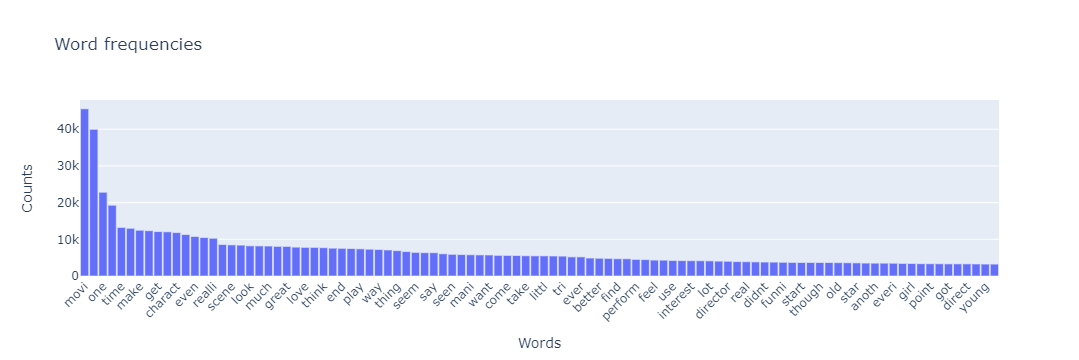

In [11]:
data_utils.frequence_des_mots(train, 'inputs_pretokenized')
#frequence_des_mots(test, 'inputs_pretokenized')

Nous constatons que les mots les plus utilisés sont des mots qui se réfèrent aux films. Ces mots ne nous apportent pas vraiment d'informations utiles. Nous allons les supprimer dans la suite de notre visualisation pour faire ressortir les mots pertinents qui nous intéressent.

## 5. Nuages de mots


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


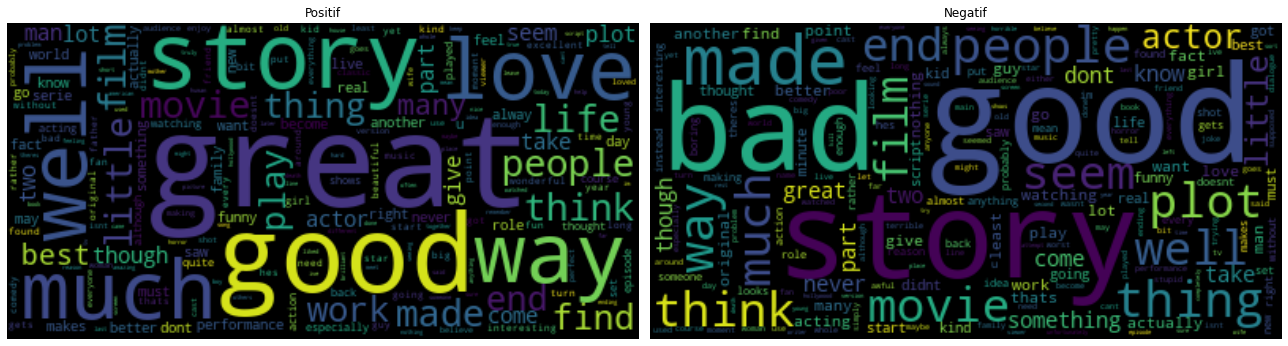

In [12]:
data_utils.generate_wordclouds(train)

In [13]:
# Extraire les adjectifs des adjectifs positifs et négatifs
adjectives_pos = []
adjectives_neg = []

for i in range(len(train)):
    if train['targets_pretokenized'][i] == ' positive':
        adjectives_pos += data_utils.extract_adjectives(train['inputs_pretokenized'][i])
    elif train['targets_pretokenized'][i] == ' negative':
        adjectives_neg += data_utils.extract_adjectives(train['inputs_pretokenized'][i])

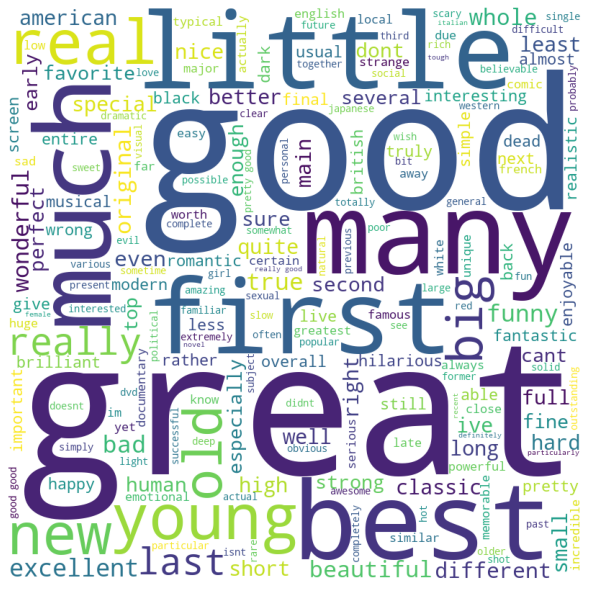

In [14]:
data_utils.create_wordcloud(adjectives_pos)

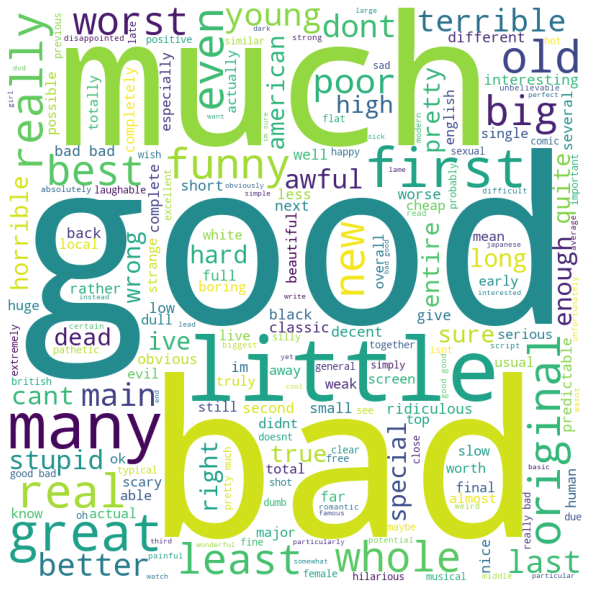

In [15]:
data_utils.create_wordcloud(adjectives_neg)

# IV. Modélisation

### 1. Préparation de la base de données


#### Transformation de la target

In [16]:
train__ = data_utils.apply_positive_indicator(train, 'targets_pretokenized')
test__  = data_utils.apply_positive_indicator(test, 'targets_pretokenized')

train.head(3)

inputs_pretokenized targets_pretokenized  \
0  bromwell high is a cartoon comedy it ran at th...             positive   
1  homelessness or houselessness as george carlin...             positive   
2  brilliant overacting by lesley ann warren best...             positive   

   nombre_phrases  nombre_mots_moyen_par_phrase  nombre_total_mots  \
0             9.0                     18.333333              165.0   
1             8.0                     55.875000              447.0   
2            11.0                     15.727273              173.0   

   nombre_mots_uniques                                          tokenized  
0                106.0  [bromwell, high, cartoon, comedy, ran, time, p...  
1                227.0  [homelessness, houselessness, george, carlin, ...  
2                120.0  [brilliant, overacting, lesley, ann, warren, b...

In [17]:
train_df = model.apply_positive_indicator(train, 'targets_pretokenized').copy()
test_df  = model.apply_positive_indicator(test, 'targets_pretokenized').copy()

train = model.apply_positive_indicator(train, 'targets_pretokenized')
test  = model.apply_positive_indicator(test, 'targets_pretokenized')

train.head(3)

inputs_pretokenized  targets_pretokenized  \
0  bromwell high is a cartoon comedy it ran at th...                     1   
1  homelessness or houselessness as george carlin...                     1   
2  brilliant overacting by lesley ann warren best...                     1   

   nombre_phrases  nombre_mots_moyen_par_phrase  nombre_total_mots  \
0             9.0                     18.333333              165.0   
1             8.0                     55.875000              447.0   
2            11.0                     15.727273              173.0   

   nombre_mots_uniques                                          tokenized  
0                106.0  [bromwell, high, cartoon, comedy, ran, time, p...  
1                227.0  [homelessness, houselessness, george, carlin, ...  
2                120.0  [brilliant, overacting, lesley, ann, warren, b...

#### Lemmatization et postag

In [ ]:
train['tokenized'] = train['tokenized'].apply(model.lemmatize_word)
train['lemmatize_word_w_pos_str'] = train['tokenized'].apply(lambda x: ' '.join(x))

test['tokenized'] = test['tokenized'].apply(model.lemmatize_word)
test['lemmatize_word_w_pos_str'] = test['tokenized'].apply(lambda x: ' '.join(x))


In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
# Apply the preprocessing function to the lemmatize_word_w_pos_str column
train['preprocessed'] = train['lemmatize_word_w_pos_str'].apply(model.preprocess)
train.head(3)

# Apply the preprocessing function to the lemmatize_word_w_pos_str column
test['preprocessed'] = test['lemmatize_word_w_pos_str'].apply(model.preprocess)
test.head(3)

#### Séparation Features et Target

In [ ]:
X_train = train['preprocessed']
X_test = test['preprocessed']

y_train = train['targets_pretokenized']
y_test = test['targets_pretokenized']

#### Word2Vec

In [ ]:
X_train, X_test, word_labels, embedding_matrix, max_length = model.preprocess_word2vec(X_train, X_test)

## 2. Construction des modèles et évaluation

### Naïve Bayes Multinomial

In [ ]:
model.train_and_evaluate_multinomialnb_model(X_train, X_test, y_train, y_test)

### SVC

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

def evaluate_model_SVC(train_df, test_df):
    # Charger les données
    X_train = train_df['inputs_pretokenized']
    X_test = test_df['inputs_pretokenized']

    y_train = train_df['targets_pretokenized']
    y_test = test_df['targets_pretokenized']

    # Convertir les critiques de film en représentation vectorielle TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    # Entraîner le modèle SVM
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Prédire les étiquettes de sentiment sur l'ensemble de test
    y_pred = svm.predict(X_test)

    # Évaluer la précision du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    # Afficher la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)

    # Calculer l'aire sous la courbe ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print('ROC AUC:', roc_auc)

    # Calculer la probabilité de chaque classe
    y_prob = svm.decision_function(X_test)

    # Calculer la courbe ROC et l'aire sous la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Afficher la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [ ]:
model.evaluate_model_SVC(train_df, test_df)

### RNN

In [ ]:
model_LSTM1 = evaluate_model_LSTMSimple(train_df, test_df)

### LSTM Mulicouches

In [ ]:
model_LSTM1 = evaluate_model_LSTM_Multicouches(train_df, test_df)